## Machine Learning 

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

# 1. Importing libraries and data

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn #these libraries is used to create a regression module
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split# is needed to run the linear regression algorithm. 
#It can be found in scikit-learn’s linear_model module, 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder # Use the LabelEncoder class 
#from the sklearn.preprocessing module to encode categorical variables into numerical values.

In [58]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [59]:
# define path
PATH = 'Data'

In [60]:
# import cleaned dataset

df= pd.read_csv(os.path.join(PATH, 'Prepared Data', 'df_new.csv'))

In [61]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States of America,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"


In [62]:
label_encoder = LabelEncoder()# encode the 'type' variable (movies vs. TV shows)
#where 'movie' is represented as 0 and 'TV show' as 1
df['Type_encoded'] = label_encoder.fit_transform(df['type'])

In [63]:
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['country'])

In [64]:
country_frequencies = df['country'].value_counts()# Count the number of titles available for each country.

In [65]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Type_encoded,Country_encoded
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States of America,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,96
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,29
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,11
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,95
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,28


# 2.Data Cleaning

In [66]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'Type_encoded',
       'Country_encoded'],
      dtype='object')

In [67]:
df.shape

(6886, 13)

In [68]:
# check for missing value

df.isnull().sum() # There is only country variable has missing value, will not remove...no impact on anlysis 

show_id            0
type               0
title              0
director           0
cast               0
country            4
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
Type_encoded       0
Country_encoded    0
dtype: int64

In [69]:
# check for duplicates

dups= df.duplicated()# no duplicates found

In [70]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
6881    False
6882    False
6883    False
6884    False
6885    False
Length: 6886, dtype: bool

In [71]:
# Group the data by release year and count the number of unique titles added each year

titles_added_per_year = df.groupby('release_year')['title'].nunique()

In [72]:
# Create a new DataFrame with the number of titles added per year

df_titles = pd.DataFrame({'release_year': titles_added_per_year.index, 'number_of_titles': titles_added_per_year.values})


In [73]:
df_titles

,release_year,number_of_titles
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1
...,...,...
67,2017,658
68,2018,648
69,2019,519
70,2020,442


/var/folders/c6/l683wjhx5lsb9xd7t_fkht780000gn/T/ipykernel_4006/1919575953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titles['number_of_titles'], bins=25) # Shows extreme values


<Axes: xlabel='number_of_titles', ylabel='Density'>

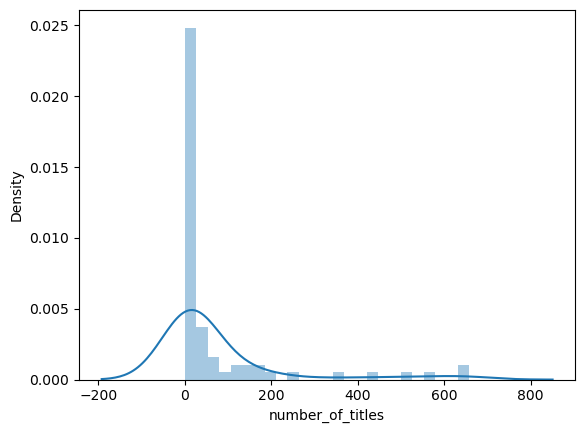

In [74]:
# check the extreme value

sns.distplot(df_titles['number_of_titles'], bins=25) # Shows extreme values
# Some of the outliers in the high values may need to be removed, but let's try without doing so first


In [75]:
df_titles['number_of_titles'].mean() # check the mean

74.11111111111111

In [76]:
df_titles['number_of_titles'].median() # check the meadian

11.0

In [77]:
df_titles['number_of_titles'].max()     # check the max 

658

## Hypothesis

The number of titles added to Netflix has increased over time.

# 3. Data prep for regression analysis

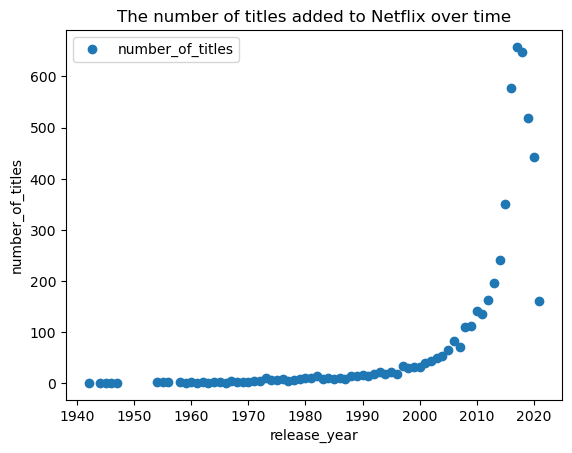

In [78]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_titles.plot(x = 'release_year', y='number_of_titles',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('The number of titles added to Netflix over time')  
plt.xlabel('release_year')  
plt.ylabel('number_of_titles')  
plt.show()

In [79]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_titles['release_year'].values.reshape(-1,1)
y = df_titles['number_of_titles'].values.reshape(-1,1)

In [80]:
X

array([[1942],
       [1944],
       [1945],
       [1946],
       [1947],
       [1954],
       [1955],
       [1956],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [20

In [81]:
y

array([[  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  2],
       [  3],
       [  2],
       [  3],
       [  1],
       [  3],
       [  1],
       [  3],
       [  1],
       [  2],
       [  2],
       [  1],
       [  4],
       [  3],
       [  2],
       [  2],
       [  5],
       [  4],
       [ 10],
       [  6],
       [  7],
       [  8],
       [  5],
       [  7],
       [  9],
       [ 11],
       [ 10],
       [ 15],
       [  9],
       [ 11],
       [  8],
       [ 11],
       [  8],
       [ 15],
       [ 15],
       [ 17],
       [ 14],
       [ 19],
       [ 23],
       [ 19],
       [ 22],
       [ 19],
       [ 33],
       [ 30],
       [ 31],
       [ 32],
       [ 40],
       [ 44],
       [ 50],
       [ 54],
       [ 65],
       [ 83],
       [ 71],
       [110],
       [112],
       [141],
       [135],
       [163],
       [197],
       [242],
       [351],
       [577],
       [658],
       [648],
       [519],
       [442],
      

In [82]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [87]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [88]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

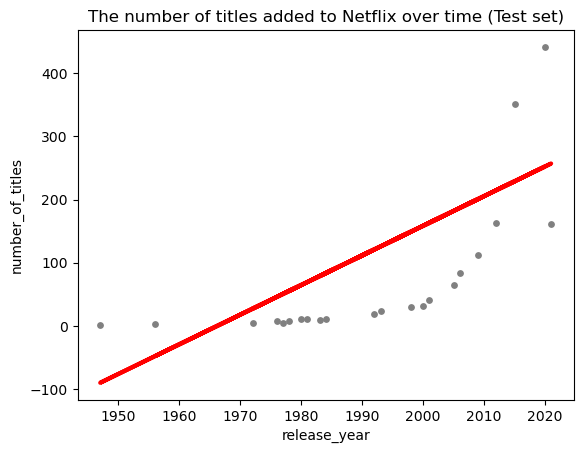

In [90]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('The number of titles added to Netflix over time (Test set)')
plot_test.xlabel('release_year')
plot_test.ylabel('number_of_titles')
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [92]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.69496521]]
Mean squared error:  8859.030498162365
R2 score:  0.3160006870491836


The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value indicates a negative relationship (as X rises, y drops), and a positive slope indicates a positive relationship (as X rises, so does y). A coefficient of zero would mean that as X rises, y stays the same.
Here, I have a positive relationship, so the coefficient is positive, too. The slope here means that as X rises (as coming years), y slightly rises (the number_of_titles rises) at a degree of 4.6949.

The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data.
In your case, the MSE is quite large at 8859. From this, it’s safe to say that a regression is not be the best model to represent this data and can’t accurately predict The number of titles added to Netflix over time.

The r-squared value (sometimes written as R2 score, especially in code), which is a metric that tells you how well the model explains the variance in the data.It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. It can also take a negative value if the model fits worse than a horizontal line.The R2 score for my model is 0.316. I can think of this as a percentage out of one hundred, or 31 percent. Since 31 percent out of one hundred isn’t that great, this means that my model, well, isn’t that great of a fit either.

In [93]:
y_predicted

array([[ 45.73731638],
       [ 50.4322816 ],
       [149.02655104],
       [ 26.95745554],
       [ 64.51717723],
       [163.11144667],
       [-48.16198785],
       [200.67116837],
       [ 83.29703808],
       [257.01075091],
       [186.58627273],
       [ 55.12724681],
       [ 69.21214244],
       [120.85675977],
       [ 78.60207287],
       [181.89130752],
       [252.3157857 ],
       [214.756064  ],
       [125.55172498],
       [-90.41667475],
       [228.84095964],
       [158.41648146]])

In [94]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(40)

,Actual,Predicted
0,8,45.737316
1,5,50.432282
2,30,149.026551
3,4,26.957456
4,11,64.517177
5,40,163.111447
6,2,-48.161988
7,112,200.671168
8,11,83.297038
9,161,257.010751


In my module's predicted values are much different from the actual values-

It means that my model isn't doing a good job of guessing the correct outcomes.
Sometimes it guesses way too high or way too low compared to what actually happens.
This could be because my model is too simple or because there are important factors it's not considering.






## Compare how the regression fits the training set

In [95]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [96]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [97]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.69496521]]
Mean squared error:  15976.619731496456
R2 score:  0.40357921125109486


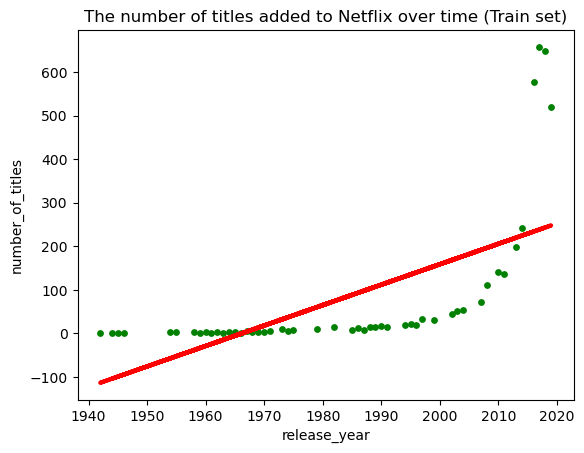

In [98]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('The number of titles added to Netflix over time (Train set)')
plot_test.xlabel('release_year')
plot_test.ylabel('number_of_titles')
plot_test.show()

# Bonus: performance improvement after removing outliers

In [99]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_titles[df_titles['number_of_titles'] <=600] 

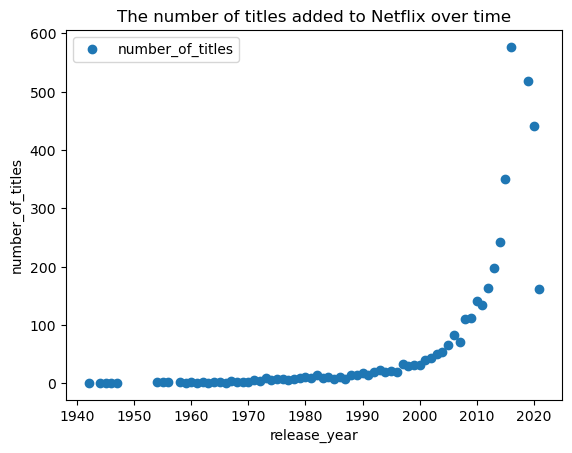

In [100]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'release_year', y='number_of_titles', style='o')  
plt.title('The number of titles added to Netflix over time')  
plt.xlabel('release_year')  
plt.ylabel('number_of_titles')  
plt.show()

In [101]:
# Reshape again.

X_2 = df_test['release_year'].values.reshape(-1,1)
y_2 = df_test['number_of_titles'].values.reshape(-1,1)

In [102]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [103]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [104]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [105]:

rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [106]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.24307888]]
Mean squared error:  7140.628294515021
R2 score:  0.470587579389388


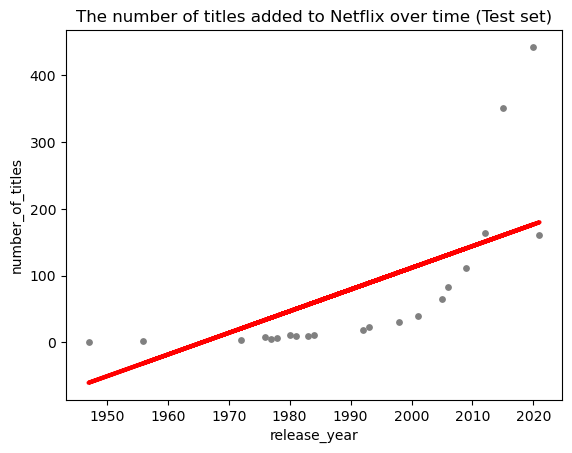

In [107]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('The number of titles added to Netflix over time (Test set)')
plot_test.xlabel('release_year')
plot_test.ylabel('number_of_titles')
plot_test.show()

In [108]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,8,33.790696
1,5,37.033775
2,30,105.138432
3,4,20.818381
4,11,46.763012
5,40,114.867668
6,2,-31.070881
7,112,140.812299
8,11,59.735327
9,161,179.729246


There is no much different after removing outlier

In [109]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Type_encoded,Country_encoded
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States of America,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,96
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,29
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,11
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,95
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,"March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",0,43
6882,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States of America,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers",0,96
6883,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States of America,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",0,96
6884,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States of America,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies",0,96


In [110]:
# export the data
df.to_csv(os.path.join(PATH, 'Prepared Data', 'Netflix_clean.csv'), index= False)

In [112]:
# export the data
df_titles.to_csv(os.path.join(PATH, 'Prepared Data', 'df_titles.csv'), index= False)